In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os DataFrames
dfSvr = pd.read_csv("resultadosModelos/dfSVR.csv", sep=';')
dfMlp = pd.read_csv("resultadosModelos/dfMLP.csv", sep=';')
dfRF = pd.read_csv("resultadosModelos/dfRF.csv", sep=';')
dfXG = pd.read_csv("resultadosModelos/dfXG.csv", sep=';')
dfBG = pd.read_csv("resultadosModelos/dfBG.csv", sep=';')
dfRNN = pd.read_csv("resultadosModelos/dfRNN.csv", sep=';')

# Obtendo as últimas três colunas de cada DataFrame
ultima_linha_svr = dfSvr.iloc[:, -3:]
ultima_linha_mlp = dfMlp.iloc[:, -3:]
ultima_linha_rf = dfRF.iloc[:, -3:]
ultima_linha_xg = dfXG.iloc[:, -3:]
ultima_linha_bg = dfBG.iloc[:, -3:]
ultima_linha_rnn = dfRNN.iloc[:, -3:]

# Selecionando apenas a última linha de cada DataFrame
ultima_linha_svr = ultima_linha_svr.tail(1)
ultima_linha_mlp = ultima_linha_mlp.tail(1)
ultima_linha_rf = ultima_linha_rf.tail(1)
ultima_linha_xg = ultima_linha_xg.tail(1)
ultima_linha_bg = ultima_linha_bg.tail(1)
ultima_linha_rnn = ultima_linha_rnn.tail(1)

# Concatenando as últimas três colunas de todos os DataFrames em um novo DataFrame
df = pd.concat([ultima_linha_svr, ultima_linha_mlp, ultima_linha_rf, ultima_linha_xg, ultima_linha_bg, ultima_linha_rnn])

# Definindo o índice do DataFrame como o nome dos modelos
df.index = ['SVR', 'MLP', 'RF', 'XGBoost', 'Bagging', 'RNN']

# Exibindo o novo DataFrame
display(df)


,MAE,MSE,RMSE
SVR,10.2300,367.8300,19.1800
MLP,13.0125,447.2325,21.0585
RF,11.5005,403.4790,20.0845
XGBoost,13.5710,407.4545,20.1850
Bagging,13.2305,404.4520,20.1100
RNN,13.1700,556.1850,23.5850


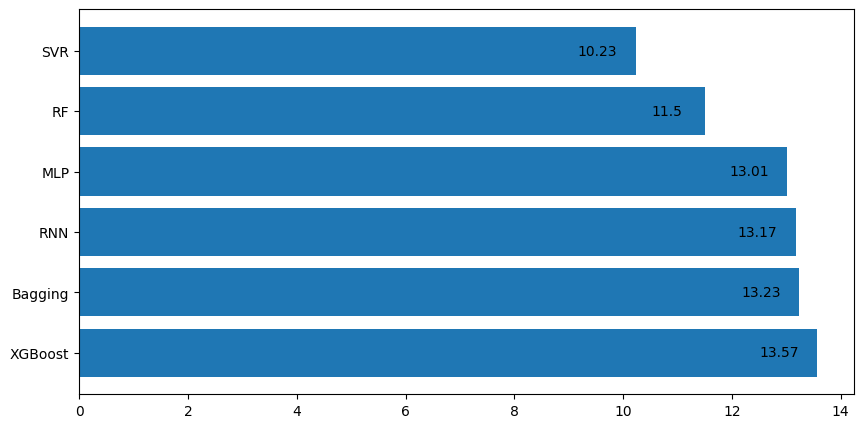

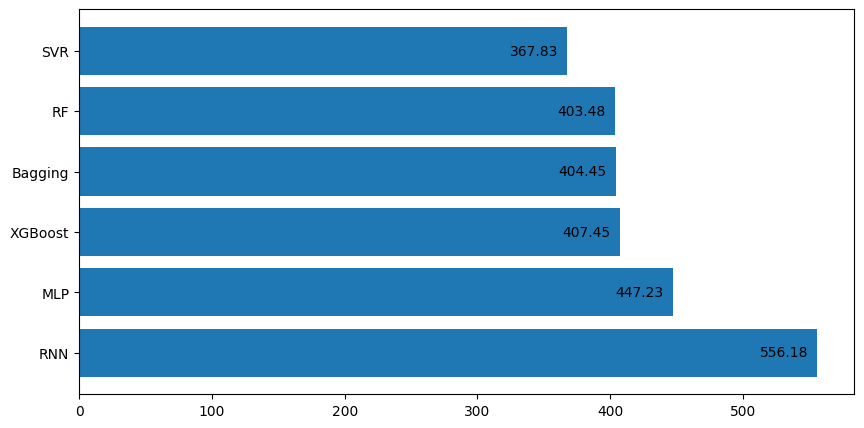

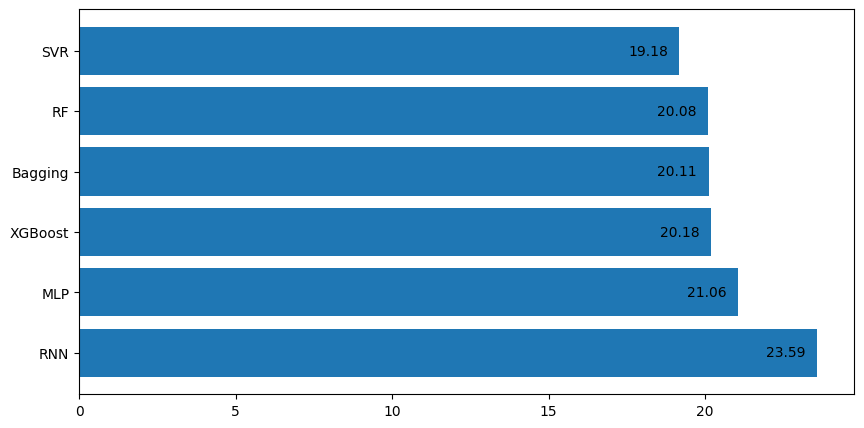

In [5]:

df_sorted = df.sort_values(by='MAE', ascending=False)
# Plotando o gráfico de barras
plt.figure(figsize=(10, 5))
plt.barh(df_sorted.index, df_sorted['MAE'])

for i, mae in enumerate(df_sorted['MAE']): 
    plt.text(mae-.7, i, str(round(mae, 2)), color='black', ha='center', va='center')


plt.savefig('graficos/maeModelos.pdf', dpi=300, bbox_inches = "tight")
plt.show()


df_sorted = df.sort_values(by='MSE', ascending=False)
# Plotando o gráfico de barras
plt.figure(figsize=(10, 5))
plt.barh(df_sorted.index, df_sorted['MSE'])

for i, MSE in enumerate(df_sorted['MSE']): 
    plt.text(MSE-25, i, str(round(MSE, 2)), color='black', ha='center', va='center')


plt.savefig('graficos/MSEModelos.pdf', dpi=300, bbox_inches = "tight")
plt.show()

df_sorted = df.sort_values(by='RMSE', ascending=False)
# Plotando o gráfico de barras
plt.figure(figsize=(10, 5))
plt.barh(df_sorted.index, df_sorted['RMSE'])

for i, RMSE in enumerate(df_sorted['RMSE']): 
    plt.text(RMSE-1, i, str(round(RMSE, 2)), color='black', ha='center', va='center')


plt.savefig('graficos/RMSEModelos.pdf', dpi=300, bbox_inches = "tight")
plt.show()